# Annex: Graphs

In this section, we can find the source code used to do the graphics of the thesis.

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = './data_test_1/'

#### Plot first row over time within a directory

In [3]:
for my_file in os.listdir(data_path):
    my_file_df = pd.read_csv(data_path + my_file, sep='\t', header=None)
    
    my_y = my_file_df.loc[0].values
    
    my_label = my_file.split('_')[1][:-4]
    
    number_of_y = 0

    filtered_y_list = list()

    for my_value in my_y:
        if my_value < 200:
            filtered_y_list.append(my_value)
            number_of_y += 1

        else:
            break
            
    my_x = [i for i in range(0, number_of_y)]
    
    print(my_label)
    plt.plot(my_x, filtered_y_list, label=my_label)
        
plt.xlabel('Time')
plt.ylabel('Distance')
plt.legend()

plt.show()

NameError: name 'data_path' is not defined

#### For different directories whith vaying Ks

#### Store all info in a dataframe before plotting

In [6]:
data_path = './Dades1/'

In [35]:
all_sims_list = list()

for my_dir in next(os.walk(data_path))[1]:
    for my_file in os.listdir(data_path + my_dir):
        my_file_df = pd.read_csv(data_path + my_dir + '/' + my_file, sep='\t', header=None)
        if my_file.startswith('r'):
        
            #From file and directory names extract a and k
            my_a = my_file.split('_')[1][:-4]
            my_a = my_a.replace('(','')
            my_a = my_a.replace(')','')
            my_a = float(my_a.split('=')[1])
            
            my_k = float(my_dir.split('=')[1])
            
            #Get first row of the dataframe.Change number after loc to get other rows 
            my_data_to_plot_df = pd.DataFrame(my_file_df.loc[0]).transpose()
            
            #Add a and k as columns in the dataframe
            my_data_to_plot_df['a'] = my_a
            my_data_to_plot_df['k'] = my_k

            #Add dataframe to list
            all_sims_list.append(my_data_to_plot_df)
            
        
        
all_sims_df = pd.concat(all_sims_list)

In [36]:
my_file


'rx-ry-inf_(a=0.7).txt'

0.0


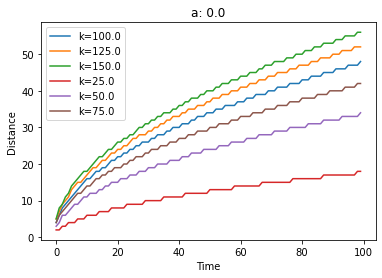

0.1


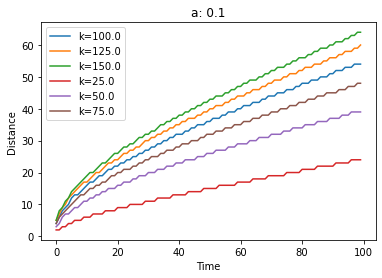

0.2


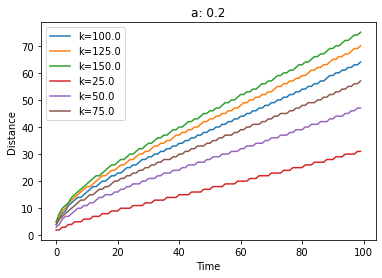

0.3


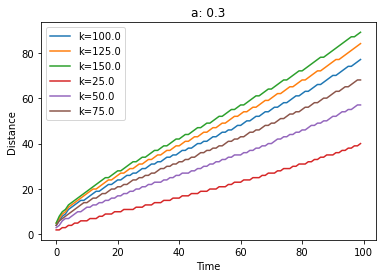

0.4


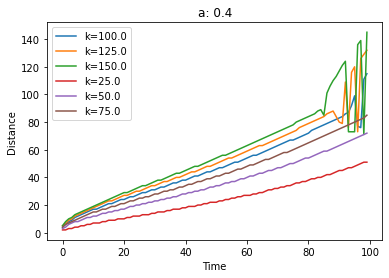

0.5


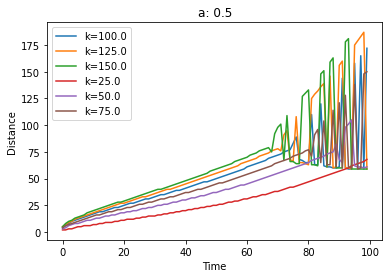

0.6


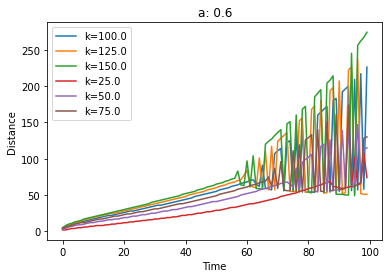

0.7


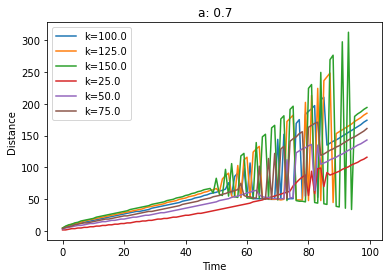

In [40]:
for my_a, my_a_df in all_sims_df.groupby('a'):
    print(my_a)
    
    for my_index, my_row in my_a_df.iterrows():
        my_k = my_row['k']
        
        my_row_list = list(my_row)[:-2]
        my_x = [i for i in range(0, len(my_row_list))]
        
        plt.plot(my_x, my_row_list, label= 'k=' + str(my_k))
        
    plt.title('a: ' + str(my_a))
        
    plt.xlabel('Time')
    plt.ylabel('Distance')
    plt.legend()
    
    #plt.ylim(0,100)#Per a canviar el rang dels eixos
    output_filename = str(my_a) + '_' + str(my_k) + '.pdf'
    output_path = './output/' + output_filename
     
   # plt.savefig(output_path)
    plt.show()

In [43]:
all_sims_df

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,a,k
0,4.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,...,46.0,46.0,46.0,47.0,47.0,47.0,47.0,48.0,0.0,100.0
0,4.0,6.0,8.0,9.0,10.0,12.0,13.0,13.0,14.0,15.0,...,52.0,52.0,53.0,53.0,53.0,54.0,54.0,54.0,0.1,100.0
0,4.0,6.0,8.0,9.0,11.0,12.0,13.0,14.0,14.0,15.0,...,60.0,61.0,61.0,62.0,62.0,63.0,63.0,64.0,0.2,100.0
0,4.0,6.0,8.0,9.0,11.0,12.0,13.0,14.0,15.0,15.0,...,71.0,72.0,73.0,74.0,74.0,75.0,76.0,77.0,0.3,100.0
0,4.0,6.0,8.0,9.0,11.0,12.0,13.0,14.0,15.0,16.0,...,86.0,87.0,92.0,99.0,77.0,76.0,111.0,115.0,0.4,100.0
0,4.0,6.0,8.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,...,60.0,59.0,59.0,158.0,60.0,165.0,59.0,172.0,0.5,100.0
0,4.0,6.0,8.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,...,196.0,200.0,56.0,209.0,57.0,217.0,58.0,226.0,0.6,100.0
0,4.0,7.0,8.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,...,152.0,155.0,158.0,161.0,164.0,167.0,171.0,174.0,0.7,100.0
0,5.0,7.0,9.0,10.0,11.0,13.0,14.0,15.0,15.0,16.0,...,50.0,51.0,51.0,51.0,51.0,52.0,52.0,52.0,0.0,125.0
0,5.0,7.0,9.0,10.0,12.0,13.0,14.0,15.0,16.0,17.0,...,57.0,57.0,58.0,58.0,58.0,59.0,59.0,60.0,0.1,125.0
